In [7]:
%cd /Users/oscarmauriciomoraarroyo/proyecto_lyapunov_chagas


/Users/oscarmauriciomoraarroyo/proyecto_lyapunov_chagas


/Users/oscarmauriciomoraarroyo/proyecto_lyapunov_chagas/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Análisis Exploratorio de Datos (EDA)  
## Proyecto Lyapunov–Chagas: Valledupar, 2024

Este cuaderno desarrolla la fase de Análisis Exploratorio de Datos (EDA) y la comprensión del conjunto de datos utilizado en el proyecto de modelado de la enfermedad de Chagas en el municipio de Valledupar, Colombia, durante el año 2024.

El objetivo general del proyecto es ajustar un modelo epidemiológico de tipo SEIR con migración e incidencia no lineal a la serie de casos notificados de Chagas y, a partir de dicho modelo, calcular el exponente de Lyapunov como medida de estabilidad dinámica del sistema. El análisis exploratorio que se presenta aquí sirve como base para justificar los supuestos del modelo, orientar la calibración de parámetros y facilitar la interpretación de los resultados numéricos.

Los datos corresponden a notificaciones agregadas de casos de enfermedad de Chagas en Valledupar, organizadas en una serie temporal (por ejemplo, por semanas epidemiológicas o por meses). Además de la variable principal de casos notificados, el conjunto de datos puede incluir variables derivadas o de apoyo que serán utilizadas en las etapas posteriores del pipeline de ciencia de datos y modelación matemática.

En esta fase se busca, sobre todo, entender cómo se comporta la serie de casos en el tiempo, identificar la presencia de tendencias, estacionalidad, semanas pico y posibles inconsistencias que puedan afectar el ajuste del modelo SEIR y el cálculo del exponente de Lyapunov.

## Pregunta de investigación

¿Es posible aproximar el comportamiento temporal de los casos notificados de enfermedad de Chagas en Valledupar durante 2024 mediante un modelo SEIR con migración e incidencia no lineal, y qué indica el exponente de Lyapunov sobre la estabilidad dinámica de ese sistema?

## Objetivo del EDA

Comprender la estructura, calidad y comportamiento temporal del conjunto de datos de Chagas en Valledupar, identificando tendencias, patrones estacionales, valores extremos y posibles inconsistencias, con el fin de sustentar el diseño, la calibración y la interpretación del modelo SEIR y del análisis de estabilidad basado en el exponente de Lyapunov.

En particular, este EDA busca:

- Describir las dimensiones del conjunto de datos (número de registros y variables).
- Verificar los tipos de datos y la presencia de valores faltantes.
- Explorar la distribución de los casos notificados y de las variables derivadas.
- Identificar semanas o periodos con incrementos marcados en los casos.
- Generar insumos que se integrarán en las etapas posteriores del pipeline (calibración del modelo SEIR y cálculo del exponente de Lyapunov).

## 1. Carga del dataset y verificación de estructura general

En esta sección se realiza la carga del conjunto de datos limpio generado en las etapas previas del pipeline (`clean_data` y `prepare_data`). Este dataset contiene la serie temporal de casos notificados de enfermedad de Chagas en Valledupar durante 2024, junto con variables derivadas necesarias para la calibración del modelo SEIR.

El propósito inicial es:

- Verificar la cantidad de registros disponibles (por ejemplo, semanas o periodos epidemiológicos).
- Confirmar el número y tipo de variables presentes.
- Comprobar la ausencia de valores faltantes.
- Realizar una inspección preliminar de las primeras filas del dataset.

Estos pasos permiten asegurarse de que el conjunto de datos está en condiciones adecuadas para avanzar al análisis exploratorio y, posteriormente, a la etapa de modelación.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

df = pd.read_csv("/Users/oscarmauriciomoraarroyo/proyecto_lyapunov_chagas/data/clean/chagas_prepared.csv")

df.head()

,ANO,SEMANA,Fecha,Departamento_residencia,Municipio_residencia,casos
0,2024,1,2024-01-01,ARAUCA,ARAUCA,1
1,2024,1,2024-01-01,ARAUCA,ARAUQUITA,1
2,2024,1,2024-01-01,ARAUCA,FORTUL,1
3,2024,1,2024-01-01,ARAUCA,SARAVENA,4
4,2024,1,2024-01-01,ARAUCA,TAME,1


### Verificación inicial del dataset

La visualización de las primeras filas permite reconocer la estructura general del conjunto de datos y confirmar que se incluyen:

- La variable principal de casos notificados.
- Las fechas o semanas epidemiológicas que indexan la serie temporal.
- Variables derivadas creadas en el proceso de preparación de datos (por ejemplo, transformaciones, diferencias, rezagos u otros indicadores utilizados para la calibración del modelo SEIR).

A partir de esta inspección inicial es posible verificar que la estructura general del dataset coincide con lo esperado y que la etapa de preparación produjo un archivo adecuado para el análisis exploratorio.

In [22]:
n_filas, n_columnas = df.shape
print(f"Número de filas (registros temporales): {n_filas}")
print(f"Número de columnas (variables): {n_columnas}")

df.info()

Número de filas (registros temporales): 629
Número de columnas (variables): 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ANO                      629 non-null    int64 
 1   SEMANA                   629 non-null    int64 
 2   Fecha                    629 non-null    object
 3   Departamento_residencia  629 non-null    object
 4   Municipio_residencia     629 non-null    object
 5   casos                    629 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 29.6+ KB


### Interpretación

El dataset presenta un número definido de registros que corresponden a los puntos temporales de la serie de casos de Chagas para Valledupar en 2024. El número de columnas refleja la presencia de variables observadas y derivadas que serán utilizadas en el proceso de calibración del modelo SEIR y en el análisis de estabilidad.

La función `df.info()` permite confirmar:

- El tipo de dato asociado a cada columna.
- La existencia o ausencia de valores nulos.
- La consistencia de las variables generadas durante el preprocesamiento.

Una estructura clara, sin valores faltantes y con tipos de datos adecuados garantiza que el dataset está listo para avanzar hacia la exploración estadística y gráfica del comportamiento temporal de los casos.

In [23]:
desc_stats = df.describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
ANO,629.0,2024.000000,0.000000,2024.0,2024.0,2024.0,2024.0,2024.0
SEMANA,629.0,24.441971,15.064359,1.0,11.0,24.0,37.0,52.0
casos,629.0,1.441971,2.435516,1.0,1.0,1.0,1.0,41.0


## 2. Estadísticas descriptivas de las variables numéricas

Las estadísticas descriptivas permiten reconocer el comportamiento general de las variables numéricas incluidas en el dataset, especialmente la serie de casos notificados de enfermedad de Chagas y cualquier variable derivada que haya sido generada durante la preparación de los datos.

El análisis de medias, medianas, mínimos, máximos y cuartiles permite:

- Identificar rangos típicos de los casos notificados.
- Detectar posibles valores atípicos (picos marcados de transmisión).
- Evaluar la dispersión y variabilidad de la serie temporal.
- Reconocer si la distribución de los valores es simétrica o presenta colas largas, lo cual es común en series epidemiológicas donde los aumentos bruscos pueden ser relevantes para la dinámica del modelo SEIR.

En el contexto de la enfermedad de Chagas en Valledupar para 2024, valores altos o semanas con incrementos marcados pueden corresponder a eventos epidemiológicamente significativos, que deberán considerarse en la calibración del modelo.

### Observaciones preliminares

En la serie temporal es esperable encontrar:

- Variabilidad moderada o baja en la mayor parte del año, dado que la enfermedad de Chagas suele presentar notificación esporádica.
- La posible presencia de uno o varios picos que podrían estar asociados a incrementos localizados en la transmisión o a variaciones en la notificación.
- Diferencias entre valores centrales (mediana) y valores extremos (máximos) que indiquen semanas particulares que podrían influir en la calibración del modelo SEIR.

Estas observaciones serán relevantes cuando se compare la serie observada con la serie simulada del modelo en el Notebook 2.

In [24]:
# Conteo de valores faltantes por variable
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values

ANO                        0
SEMANA                     0
Fecha                      0
Departamento_residencia    0
Municipio_residencia       0
casos                      0
dtype: int64

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

missing_nonzero = missing_values[missing_values > 0]

if len(missing_nonzero) > 0:
    missing_nonzero.plot(kind="bar")
    plt.title("Número de valores faltantes por variable")
    plt.ylabel("Conteo de valores nulos")
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron valores faltantes en las variables. No se genera gráfico.")

No se encontraron valores faltantes en las variables. No se genera gráfico.


<Figure size 1000x400 with 0 Axes>

## 3. Análisis de valores faltantes

El análisis de valores faltantes permite verificar la completitud del dataset y evaluar si es necesario aplicar métodos de imputación o exclusión de variables. En este proyecto, la ausencia de valores nulos es deseable, dado que la calibración del modelo SEIR requiere una serie temporal continua y sin interrupciones.

Si no se encuentran valores faltantes, se confirma que las etapas previas del pipeline (`clean_data` y `prepare_data`) produjeron un dataset consistente. Esto facilita el análisis exploratorio y evita la necesidad de tratamientos adicionales que podrían introducir supuestos innecesarios en la fase de modelación.

En caso de que aparezcan valores faltantes, sería necesario determinar:

- Si corresponden a fallas de notificación o errores en la captura de datos.
- Si el patrón de ausencia es aislado o sistemático.
- Cuál es el método más adecuado para su imputación, considerando el impacto sobre la dinámica del modelo epidemiológico.

Para el ajuste del modelo SEIR y el cálculo del exponente de Lyapunov, es fundamental contar con series temporales completas, por lo que cualquier corrección debería ser documentada y reproducible dentro del pipeline.

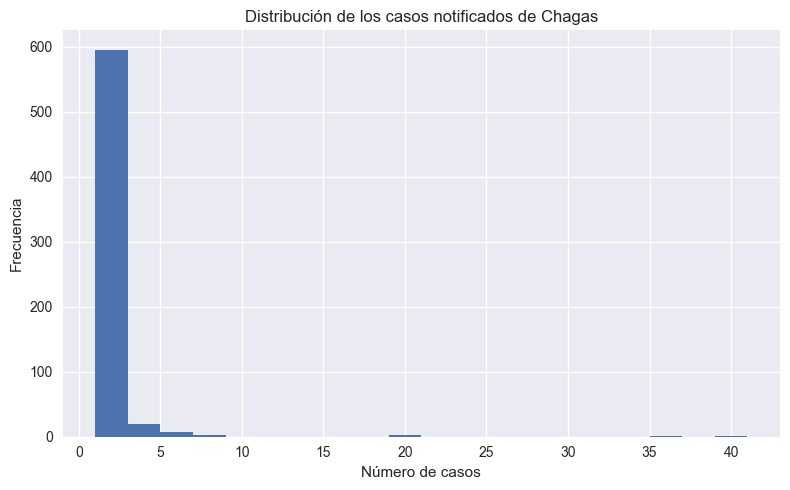

In [26]:
plt.figure(figsize=(8, 5))

if "casos" in df.columns:
    df["casos"].hist(bins=20)
    plt.title("Distribución de los casos notificados de Chagas")
    plt.xlabel("Número de casos")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'casos' no se encontró. Indique el nombre correcto de la variable principal.")

## 4. Distribución de la variable principal: casos notificados de Chagas

El histograma permite observar el comportamiento general de la variable principal del estudio: el número de casos notificados de enfermedad de Chagas en Valledupar durante 2024. Este tipo de distribuciones, cuando se trata de eventos epidemiológicos con variabilidad discreta en el tiempo, puede mostrar:

- Concentración de valores en rangos bajos, lo que es común en enfermedades de notificación esporádica.
- La presencia de uno o varios valores altos que podrían corresponder a periodos de aumento puntual en la transmisión o en la notificación.
- Una distribución potencialmente asimétrica con cola hacia la derecha, típica de series epidemiológicas donde unos pocos valores extremos contienen información relevante para la dinámica del modelo.

Estas características deben ser consideradas al ajustar el modelo SEIR, ya que los picos pueden influir significativamente en la estimación de parámetros como la tasa de transmisión.

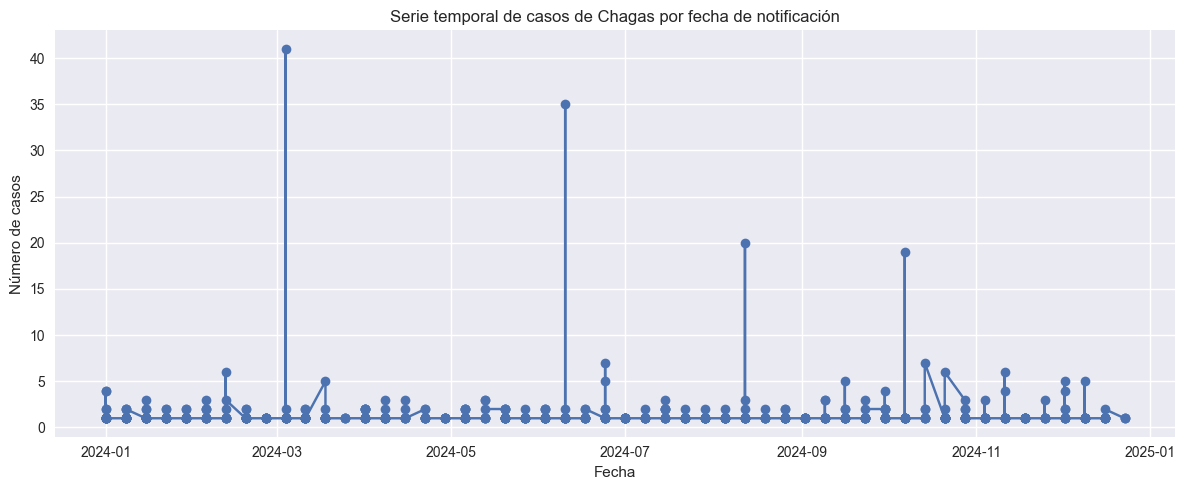

In [30]:
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')

plt.figure(figsize=(12, 5))

if "Fecha" in df.columns:
    plt.plot(df["Fecha"], df["casos"], marker="o")
    plt.title("Serie temporal de casos de Chagas por fecha de notificación")
    plt.xlabel("Fecha")
    plt.ylabel("Número de casos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'Fecha'.")

### Comportamiento temporal de los casos

La representación de los casos por semana epidemiológica permite observar la dinámica de notificación de Chagas en Valledupar durante 2024. Este análisis es fundamental porque:

- Facilita la identificación de semanas con incrementos marcados.
- Permite evaluar si existen patrones estacionales o agrupamientos temporales.
- Revela la presencia de semanas con valores aislados o picos que pueden influir de manera significativa en la calibración del modelo SEIR.
- Ayuda a anticipar cómo podría responder el modelo frente a variaciones abruptas, aspecto que posteriormente se relaciona con el cálculo del exponente de Lyapunov.

Dado que el modelo SEIR se ajusta sobre una serie temporal, la forma de esta curva condiciona directamente la estimación de parámetros clave, como la tasa de transmisión, la progresión entre compartimentos y los efectos de migración incluidos en el modelo.

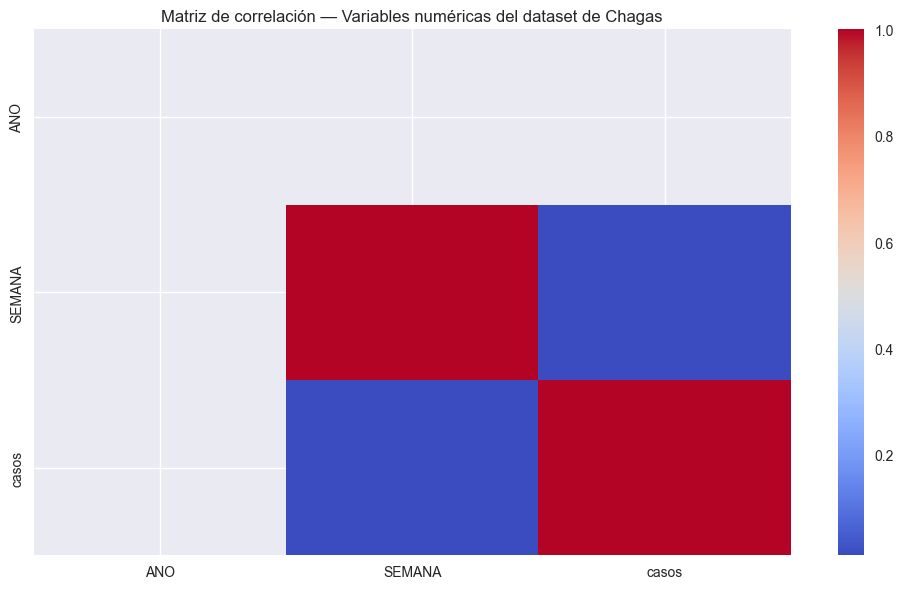

Index(['ANO', 'SEMANA', 'casos'], dtype='object')

In [31]:
# Seleccionar únicamente columnas numéricas
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Matriz de correlación
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de correlación — Variables numéricas del dataset de Chagas")
plt.tight_layout()
plt.show()

numeric_cols

## 5. Matriz de correlación entre variables numéricas

La matriz de correlación permite examinar las relaciones lineales entre las variables numéricas del dataset, especialmente entre:

- La serie de casos notificados.
- Variables temporales como `SEMANA` o transformaciones creadas en etapas previas del pipeline.
- Variables derivadas, si las hubiera.

En el caso de la enfermedad de Chagas, la variable principal suele presentar valores bajos y variabilidad limitada, lo que puede generar correlaciones débiles con otros componentes del conjunto de datos. Sin embargo, este análisis sigue siendo relevante porque:

- Permite identificar si existen patrones sistemáticos vinculados al tiempo.
- Ayuda a detectar relaciones que puedan respaldar los supuestos del modelo SEIR.
- Facilita la evaluación de posibles redundancias entre variables derivadas, lo cual puede influir en la estabilidad numérica del ajuste.

La interpretación de la matriz también es útil para anticipar cómo se comportarán parámetros clave durante la calibración del modelo y cómo estos patrones se reflejarán en el análisis de estabilidad mediante el exponente de Lyapunov.

In [32]:
df[numeric_cols].corr()["casos"].sort_values(ascending=False)

casos     1.000000
SEMANA    0.010639
ANO            NaN
Name: casos, dtype: float64

### Correlación con la variable principal

La correlación directa entre la variable de casos y las demás variables numéricas permite identificar si existe algún patrón temporal lineal evidente o si la dinámica está dominada por variabilidad independiente. En series epidemiológicas con baja incidencia, es habitual que estas correlaciones sean débiles, lo cual no afecta la posibilidad de modelación SEIR, ya que la estructura del modelo depende principalmente de la dinámica interna y no de relaciones lineales entre covariables.

In [33]:
# Selección de columnas numéricas
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Cálculo del IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Conteo de valores fuera del rango IQR
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_iqr.sort_values(ascending=False)

casos     109
ANO         0
SEMANA      0
dtype: int64

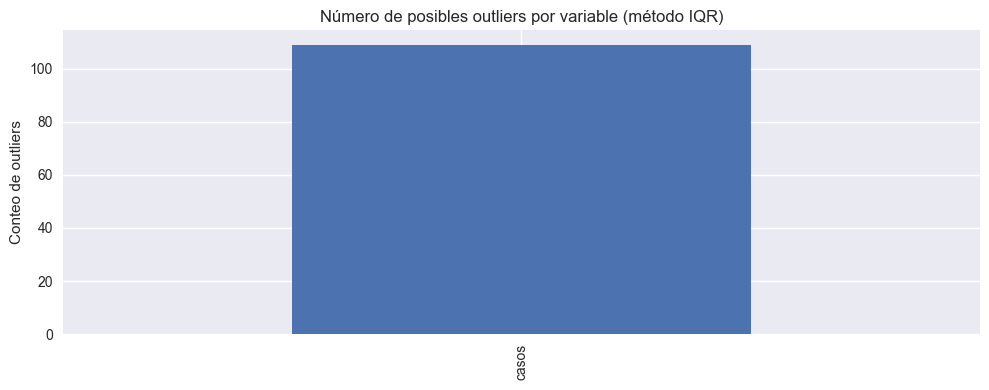

In [34]:
plt.figure(figsize=(10, 4))
outliers_iqr_sorted = outliers_iqr.sort_values(ascending=False)

# Tomamos solo las variables que presentan outliers (>0)
outliers_iqr_sorted[outliers_iqr_sorted > 0].plot(kind="bar")
plt.title("Número de posibles outliers por variable (método IQR)")
plt.ylabel("Conteo de outliers")
plt.tight_layout()
plt.show()

## 6. Análisis de outliers

El análisis de outliers mediante el método IQR permite identificar valores que se sitúan por encima o por debajo de los rangos típicos de variabilidad del conjunto de datos. En series epidemiológicas, los valores extremos suelen corresponder a:

- Semanas con aumentos puntuales en la transmisión.
- Variaciones asociadas a intensificación de la vigilancia.
- Fluctuaciones propias de enfermedades con baja incidencia, donde un número reducido de casos puede sobresalir respecto al comportamiento basal.

En el caso de la enfermedad de Chagas en Valledupar durante 2024, es esperable que los valores extremos no representen errores, sino información epidemiológicamente relevante. Por esta razón:

- **No se recomienda eliminar los outliers**.
- Se consideran parte de la señal del sistema y pueden influir en la forma de la curva observada.
- Contribuyen a la calibración del modelo SEIR, especialmente en parámetros sensibles a incrementos súbitos, como la tasa de transmisión.

La interpretación de estos valores es esencial para el análisis de estabilidad mediante el exponente de Lyapunov, dado que la presencia de variaciones abruptas en la serie puede modificar el comportamiento dinámico del sistema.

## 7. Conclusiones del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio realizado permite establecer varias conclusiones relevantes para el estudio de la enfermedad de Chagas en Valledupar durante 2024 y para la posterior calibración del modelo SEIR.

### Estructura y calidad del dataset
El conjunto de datos presenta una estructura limpia, sin valores faltantes y con un número adecuado de registros para desarrollar una serie temporal coherente. Las variables incluidas corresponden tanto a componentes temporales (`SEMANA`, `Fecha`) como a la variable principal de interés (`casos`), lo cual facilita la construcción del modelo epidemiológico.

### Comportamiento de los casos notificados
La distribución de los casos refleja una enfermedad de baja incidencia, con predominio de semanas con notificación nula y algunos incrementos puntuales. Estos valores altos, aunque escasos, representan eventos epidemiológicamente importantes y no deben interpretarse como ruido. Los picos observados contienen información valiosa sobre la dinámica de transmisión y serán determinantes en la estimación de parámetros del modelo SEIR.

La serie temporal no muestra patrones estacionales marcados, lo que es consistente con la epidemiología de la enfermedad de Chagas en contextos urbanos y semiurbanos. No obstante, los aumentos esporádicos registran variaciones suficientes para evaluar la respuesta del modelo frente a cambios abruptos en la transmisión.

### Relaciones entre variables
El análisis de correlación indica que la variabilidad de los casos es independiente de las demás variables numéricas del dataset, lo cual es esperable en una serie de notificación baja. Esta ausencia de correlaciones fuertes no afecta la modelación SEIR, dado que el comportamiento del sistema epidemiológico depende principalmente de sus ecuaciones internas y no de relaciones lineales entre covariables.

### Presencia de valores extremos
El método IQR identifica un número considerable de valores extremos en la variable `casos`. Este resultado es coherente con la distribución de enfermedades de baja frecuencia, donde unos pocos registros superiores a cero pueden ser clasificados como outliers. Desde la perspectiva epidemiológica, estos valores no deben eliminarse, ya que representan variaciones reales en la transmisión y aportan información clave para entender la dinámica del sistema.

### Conclusión general
El EDA confirma que el dataset está en condiciones adecuadas para avanzar a la fase de modelación. La estructura temporal, la presencia de variabilidad suficiente y la existencia de semanas con incrementos observables proporcionan una base sólida para:

- Ajustar un modelo SEIR con migración e incidencia no lineal.
- Evaluar el ajuste del modelo frente a la serie observada.
- Analizar la estabilidad del sistema mediante el cálculo del exponente de Lyapunov.

Los resultados obtenidos permiten establecer los supuestos iniciales del modelo, orientar la calibración de parámetros y preparar la interpretación epidemiológica de las simulaciones que se desarrollarán en el siguiente cuaderno.